In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns


In [3]:
df = pd.read_csv('C:/Users/NP16/Desktop/DATA/case study/ApartmentTrading.csv')
df.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,75.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,6300.0,84.000000,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
1,1,115.0,Đông Nam,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,10250.0,89.130435,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
2,2,100.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,2600.0,26.000000,NaN,NaN,5e958ee8208d0d6d7648f9da,Phố Thành Công Bắc,NaN,NaN,5e5501cbeb80a7245175e0ee,Phường Thành Công
3,3,30.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,2.0,NaN,...,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,72.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,3.0,NaN,...,1750.0,24.305556,NaN,NaN,5e958ee8208d0d6d7648f9bf,Phố Đặng Dung,NaN,NaN,5e5501cbeb80a7245175e0e7,Phường Quán Thánh


In [4]:
data = df[df['ten_quan']=='Quận Nam Từ Liêm']
data.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
26311,26311,58.00,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,1830.0,31.551724,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26312,26312,90.00,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,2700.0,30.000000,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26313,26313,99.00,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,2475.0,25.000000,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26314,26314,92.65,Tây-Bắc,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,13.0,8.0,...,3020.0,32.595791,NaN,NaN,5e958eeb208d0d6d764900fc,Phố Trần Bình,NaN,NaN,5e5501cbeb80a7245175e1ad,Phường Mỹ Đình 2
26315,26315,70.00,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,1820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6622 entries, 26311 to 32934
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6622 non-null   int64  
 1   dien_tich         6449 non-null   float64
 2   huong_ban_cong    2307 non-null   object 
 3   phong_ngu         5068 non-null   float64
 4   id_thanh_pho      6622 non-null   object 
 5   ten_thanh_pho     6622 non-null   object 
 6   id_quan           6622 non-null   object 
 7   ten_quan          6622 non-null   object 
 8   so_tang           351 non-null    float64
 9   mat_tien          67 non-null     float64
 10  noi_that          3004 non-null   object 
 11  huong_nha         3054 non-null   object 
 12  so_do             3829 non-null   object 
 13  lat               6618 non-null   float64
 14  long              6618 non-null   float64
 15  gia               5957 non-null   float64
 16  gia_m2            5910 non-null   flo

(6622, 25)

In [6]:
data.columns


Index(['Unnamed: 0', 'dien_tich', 'huong_ban_cong', 'phong_ngu',
       'id_thanh_pho', 'ten_thanh_pho', 'id_quan', 'ten_quan', 'so_tang',
       'mat_tien', 'noi_that', 'huong_nha', 'so_do', 'lat', 'long', 'gia',
       'gia_m2', 'du_an', 'project_name', 'id_duong', 'ten_duong',
       'do_rong_duong', 'do_rong_duong_ml', 'id_phuong', 'ten_phuong'],
      dtype='object')

## Tiền xử lý dữ liệu

xử lý dữ liệu cột giá/m2

C:\Users\NP16\AppData\Local\Temp\ipykernel_20640\2785255513.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.gia_m2)


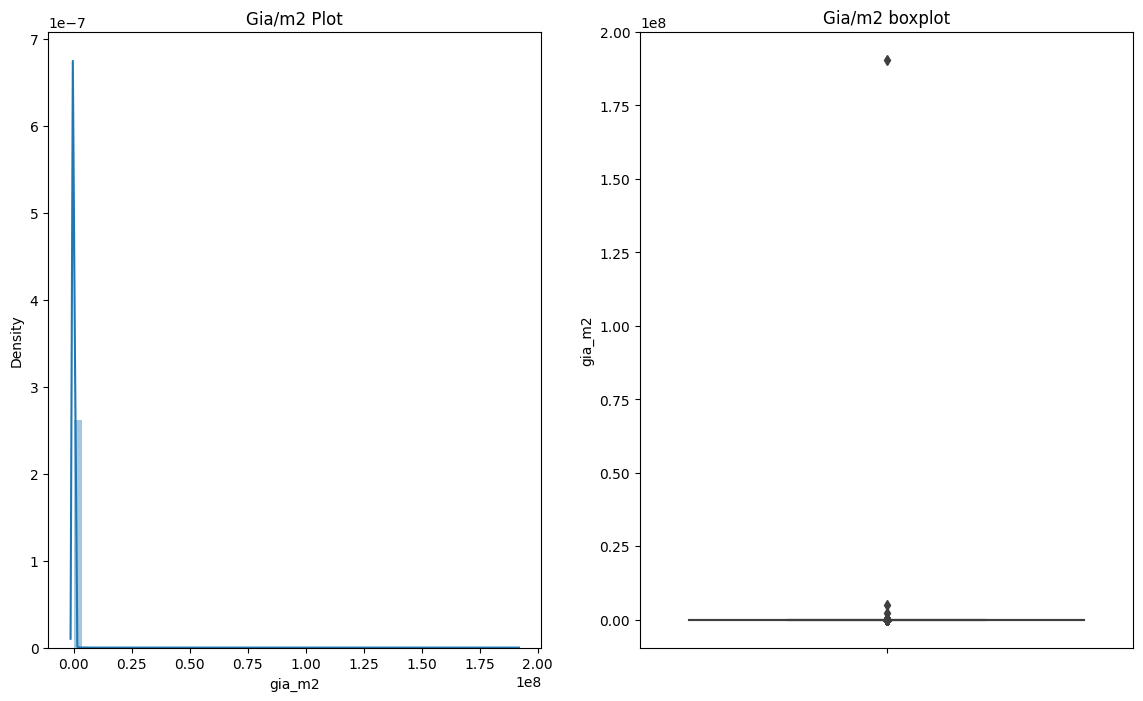

In [8]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Gia/m2 Plot')
sns.distplot(data.gia_m2)

plt.subplot(1,2,2)
plt.title('Gia/m2 boxplot')
sns.boxplot(y=data.gia_m2)

plt.show()

dựa vào đồ thị, loại bỏ các dữ liệu có giá <10

In [9]:
data = data[data['gia_m2'] >10]
data.head()
data['gia_m2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5687 entries, 26311 to 32934
Series name: gia_m2
Non-Null Count  Dtype  
--------------  -----  
5687 non-null   float64
dtypes: float64(1)
memory usage: 88.9 KB


xử lý số liệu cột diện tích

C:\Users\NP16\AppData\Local\Temp\ipykernel_20640\343095923.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.dien_tich)


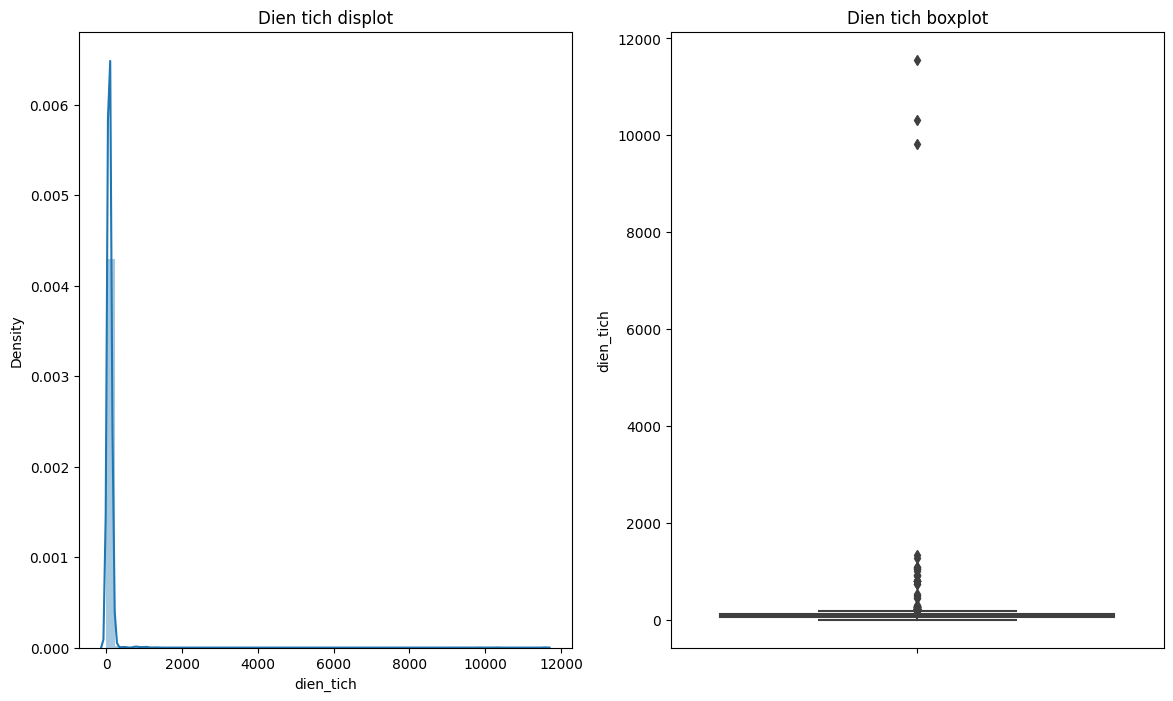

In [10]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Dien tich displot')
sns.distplot(data.dien_tich)

plt.subplot(1,2,2)
plt.title('Dien tich boxplot')
sns.boxplot(y=data.dien_tich)

plt.show()

In [11]:
data['dien_tich'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5687 entries, 26311 to 32934
Series name: dien_tich
Non-Null Count  Dtype  
--------------  -----  
5671 non-null   float64
dtypes: float64(1)
memory usage: 88.9 KB


điền các dữ liệu khuyết thiếu tại cột diện tích bằng cách lấy cột giá chia cho giá/m2

In [12]:
data['dien_tich'].fillna(data['gia']/data['gia_m2'])
data['dien_tich'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5687 entries, 26311 to 32934
Series name: dien_tich
Non-Null Count  Dtype  
--------------  -----  
5671 non-null   float64
dtypes: float64(1)
memory usage: 88.9 KB


điền các dữ liệu khuyết thiết cột diện tích dựa vào số phòng ngủ
(40,70) -> 1 phòng ngủ
(70,120) -> 2 phòng ngủ
(120,150) -> 3 phòng ngủ
> 150 -> 4 phòng ngủ
=> điền giá trị nhỏ nhất trong khoảng giá trị

In [13]:
def _fix_area(area,value):
    if area == None or area < 40:
        if value == 1:
            return 40
        elif value == 2:
            return 70
        elif value == 3:
            return 120
        elif value == 4:
            return 150
        else:
            return area
    else:
        return area


data["dien_tich"] = data.apply(lambda x : _fix_area(x['dien_tich'],x['phong_ngu']),axis= 1)
data['dien_tich'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5687 entries, 26311 to 32934
Series name: dien_tich
Non-Null Count  Dtype  
--------------  -----  
5671 non-null   float64
dtypes: float64(1)
memory usage: 88.9 KB


C:\Users\NP16\AppData\Local\Temp\ipykernel_20640\343095923.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.dien_tich)


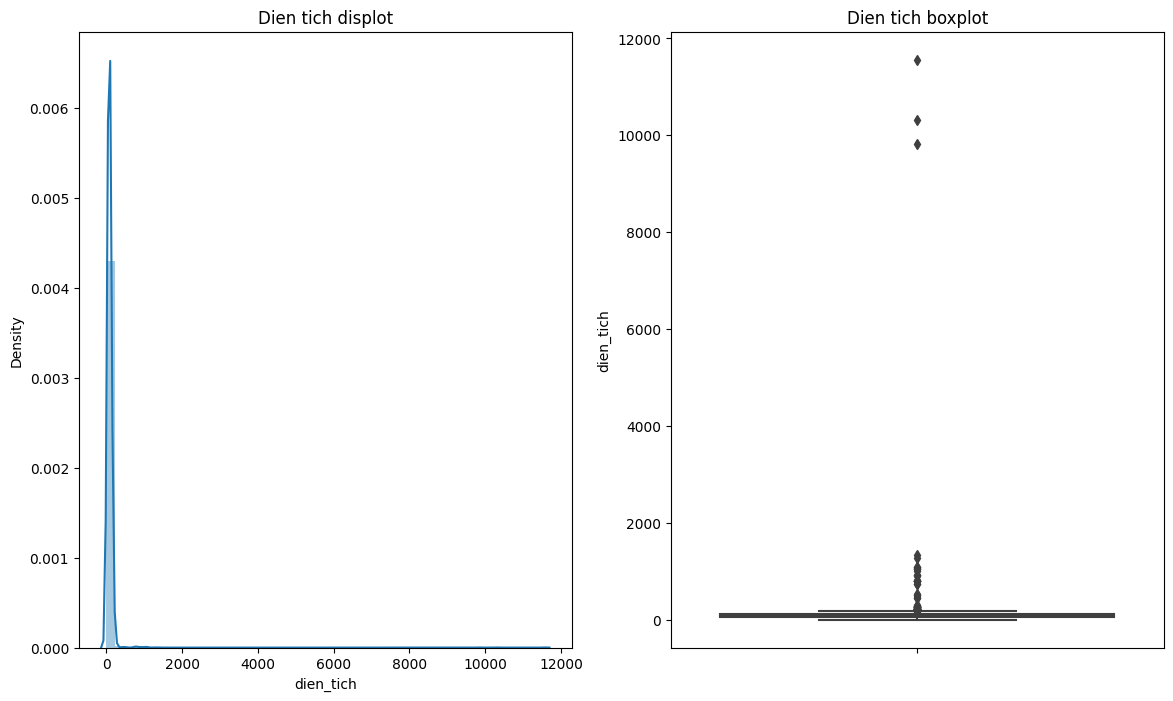

In [14]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Dien tich displot')
sns.distplot(data.dien_tich)

plt.subplot(1,2,2)
plt.title('Dien tich boxplot')
sns.boxplot(y=data.dien_tich)

plt.show()

In [15]:
Q1 = data['dien_tich'].quantile(0.25)
Q3 = data['dien_tich'].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
data= data[~((data['dien_tich'] < (Q1 - 1.5 * IQR)) | (data['dien_tich'] > (Q3 + 1.5 * IQR)))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 26311 to 32934
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5568 non-null   int64  
 1   dien_tich         5552 non-null   float64
 2   huong_ban_cong    1989 non-null   object 
 3   phong_ngu         4299 non-null   float64
 4   id_thanh_pho      5568 non-null   object 
 5   ten_thanh_pho     5568 non-null   object 
 6   id_quan           5568 non-null   object 
 7   ten_quan          5568 non-null   object 
 8   so_tang           324 non-null    float64
 9   mat_tien          60 non-null     float64
 10  noi_that          2509 non-null   object 
 11  huong_nha         2677 non-null   object 
 12  so_do             3225 non-null   object 
 13  lat               5566 non-null   float64
 14  long              5566 non-null   float64
 15  gia               5493 non-null   float64
 16  gia_m2            5568 non-null   flo

xử lý số liệu cột phòng ngủ

C:\Users\NP16\AppData\Local\Temp\ipykernel_20640\2654795175.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.phong_ngu)


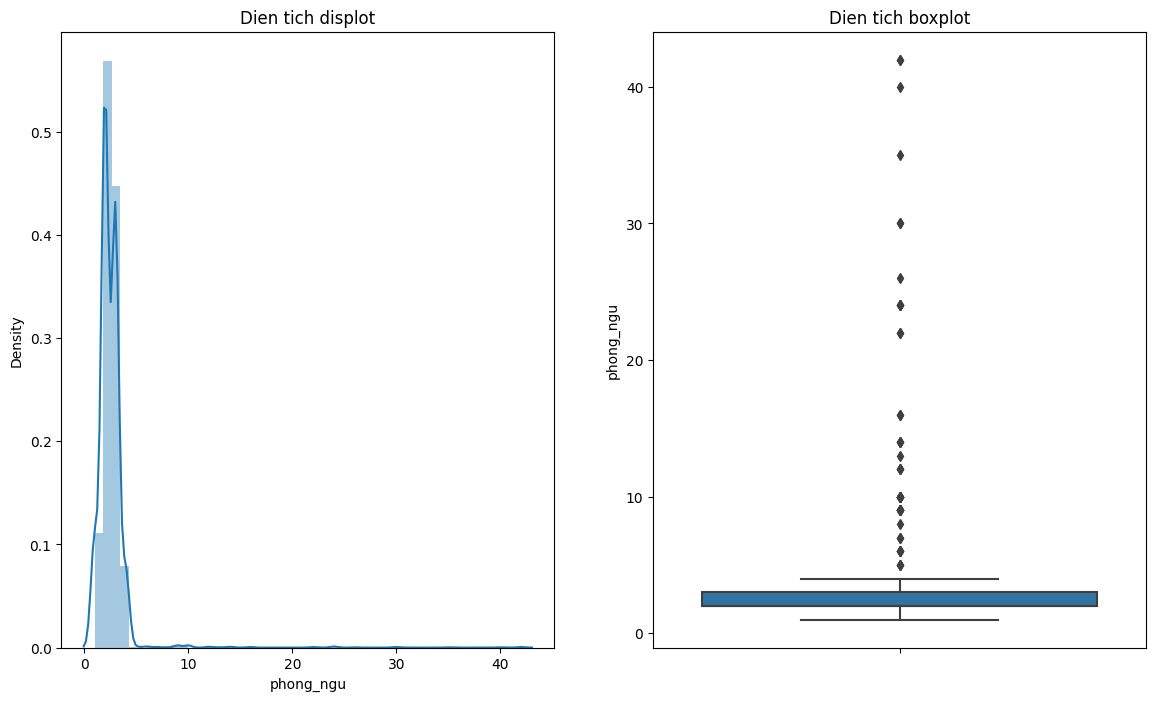

In [17]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Dien tich displot')
sns.distplot(data.phong_ngu)

plt.subplot(1,2,2)
plt.title('Dien tich boxplot')
sns.boxplot(y=data.phong_ngu)

plt.show();

phòng ngủ sẽ bao gồm các giá trị 1, 2, 3, 4
nên các giá trị ngoài sẽ là các giá trị ngoại lai

In [18]:
def _fix_pn(value, area):
    if value > 0 and value <5:
        return value
    if (area >= 40) and (area < 70):
        return 1
    elif (area >= 70) and (area < 120):
        return 2
    elif (area > 120) and (area < 150):
        return 3
    elif (area >= 150):
        return 4
    else:
        return None

data["phong_ngu"] = data.apply(lambda x : _fix_pn(x['phong_ngu'],x['dien_tich']),axis= 1)
data['phong_ngu'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5568 entries, 26311 to 32934
Series name: phong_ngu
Non-Null Count  Dtype  
--------------  -----  
5381 non-null   float64
dtypes: float64(1)
memory usage: 87.0 KB


In [19]:
data.dropna(subset= ['dien_tich', 'phong_ngu'], inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 26311 to 32934
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5376 non-null   int64  
 1   dien_tich         5376 non-null   float64
 2   huong_ban_cong    1967 non-null   object 
 3   phong_ngu         5376 non-null   float64
 4   id_thanh_pho      5376 non-null   object 
 5   ten_thanh_pho     5376 non-null   object 
 6   id_quan           5376 non-null   object 
 7   ten_quan          5376 non-null   object 
 8   so_tang           316 non-null    float64
 9   mat_tien          59 non-null     float64
 10  noi_that          2480 non-null   object 
 11  huong_nha         2600 non-null   object 
 12  so_do             3172 non-null   object 
 13  lat               5374 non-null   float64
 14  long              5374 non-null   float64
 15  gia               5316 non-null   float64
 16  gia_m2            5376 non-null   flo

XỬ LÝ DỮ LIỆU CỘT NỘI THẤT

In [20]:
data['noi_that'].info()
def _found_text(text, list_item):
    # check whether the text contains any item within the list_item
    for item in list_item:
        if item in text:
            return True
    return False

def convert_furniture(furniture):
    try:
        furniture = furniture.lower()
        if _found_text(furniture, ['cao cấp', 'xách vali', 'mang vali', 'ở ngay', 'full nội thất', 'mang quần áo vào ở', 'đủ đồ']):
            return 2
        elif _found_text(furniture, ['cơ bản', 'nguyên bản', 'đã có đồ']):
            return 1
        elif (_found_text(furniture, ['điều hoà', 'tủ bếp'])):
            if _found_text(furniture, ['giường']):
                return 2
            elif _found_text(furniture, ['thiếu', 'giường']):
                return 1

            else:
                return 1
        elif _found_text(furniture, ['nội thất']):
            if _found_text(furniture, ['cao cấp', 'đầy đủ', 'full']):
                return 2
            elif _found_text(furniture, ['cơ bản']):
                return 1
        elif _found_text(furniture, ['đầy đủ nội thất cơ bản']):
            return 1
    except:
        return None
data['noi_that'] = data['noi_that'].apply(convert_furniture)
data['noi_that'].info()


<class 'pandas.core.series.Series'>
Int64Index: 5376 entries, 26311 to 32934
Series name: noi_that
Non-Null Count  Dtype 
--------------  ----- 
2480 non-null   object
dtypes: object(1)
memory usage: 84.0+ KB
<class 'pandas.core.series.Series'>
Int64Index: 5376 entries, 26311 to 32934
Series name: noi_that
Non-Null Count  Dtype  
--------------  -----  
1810 non-null   float64
dtypes: float64(1)
memory usage: 84.0 KB


XỬ LÝ DỮ LIỆU CỘT SỔ ĐỎ

In [21]:
data['so_do'].info()
def convert_sodo(sodo):
    try:
        sodo = sodo.lower()
        if _found_text(sodo,['có', 'sổ đỏ', 'sổ hồng', 'lâu dài', 'chính chủ','đã nhận nhà']):
            return 1
        elif _found_text(sodo, ['đang chờ', 'đợi sổ', 'đang đợi', 'pháp lý đảm bảo']):
            return 2
        elif _found_text(sodo,['sau 3 tháng nhận nhà', 'sang tên hợp đồng mua bán']):
            return 3
    except:
        return 0

data['so_do'] = data['so_do'].apply(convert_sodo)
data['so_do'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5376 entries, 26311 to 32934
Series name: so_do
Non-Null Count  Dtype 
--------------  ----- 
3172 non-null   object
dtypes: object(1)
memory usage: 84.0+ KB
<class 'pandas.core.series.Series'>
Int64Index: 5376 entries, 26311 to 32934
Series name: so_do
Non-Null Count  Dtype  
--------------  -----  
5169 non-null   float64
dtypes: float64(1)
memory usage: 84.0 KB


In [22]:
data.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
26311,26311,58.00,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,1830.0,31.551724,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26312,26312,90.00,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,2700.0,30.000000,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26313,26313,99.00,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,2475.0,25.000000,5e5501fceb80a7245176a8af,Khu phức hợp cao tầng Mỹ Đình,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,NaN,NaN,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
26314,26314,92.65,Tây-Bắc,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,13.0,8.0,...,3020.0,32.595791,NaN,NaN,5e958eeb208d0d6d764900fc,Phố Trần Bình,NaN,NaN,5e5501cbeb80a7245175e1ad,Phường Mỹ Đình 2
26316,26316,87.00,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,...,3915.0,45.000000,5e5501fceb80a7245176a8ca,The Matrix One,5e958eeb208d0d6d76490090,Đường Lê Quang Đạo,NaN,NaN,5e5501cbeb80a7245175e1af,Phường Mễ Trì


<AxesSubplot:>

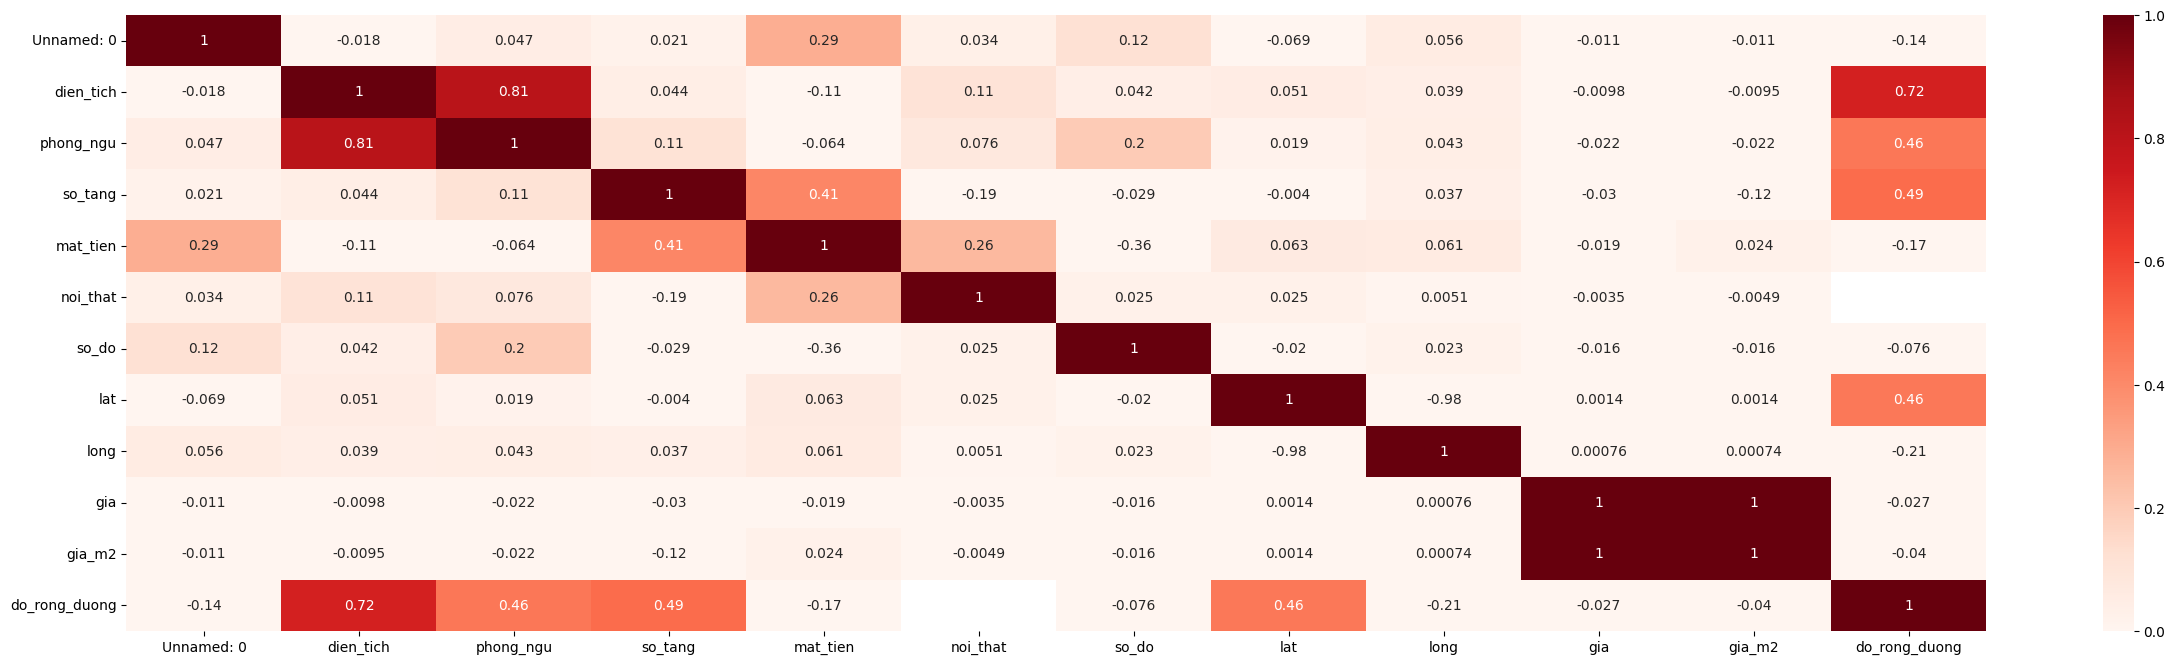

In [23]:
plt.figure(figsize=(30,8))
sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, cmap=plt.cm.Reds)

In [24]:
data["so_tang"] = data["so_tang"].fillna('NULL').astype('category').cat.codes
data["huong_ban_cong"] = data["huong_ban_cong"].fillna('NULL').astype('category').cat.codes
data["mat_tien"] = data["mat_tien"].fillna('NULL').astype('category').cat.codes
data['do_rong_duong']=data['do_rong_duong'].fillna(value=2.5).astype('category').cat.codes # Độ rộng đường trong khoảng 2.5 đến 4.5
data["project_name"] = data["project_name"].fillna('NULL').astype('category').cat.codes
data["noi_that"] = data["noi_that"].fillna('NULL').astype('category').cat.codes
data["huong_nha"] = data["huong_nha"].fillna('NULL').astype('category').cat.codes
data["so_do"] = data["so_do"].fillna('NULL').astype('category').cat.codes

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 26311 to 32934
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5376 non-null   int64  
 1   dien_tich         5376 non-null   float64
 2   huong_ban_cong    5376 non-null   int8   
 3   phong_ngu         5376 non-null   float64
 4   id_thanh_pho      5376 non-null   object 
 5   ten_thanh_pho     5376 non-null   object 
 6   id_quan           5376 non-null   object 
 7   ten_quan          5376 non-null   object 
 8   so_tang           5376 non-null   int8   
 9   mat_tien          5376 non-null   int8   
 10  noi_that          5376 non-null   int8   
 11  huong_nha         5376 non-null   int8   
 12  so_do             5376 non-null   int8   
 13  lat               5374 non-null   float64
 14  long              5374 non-null   float64
 15  gia               5316 non-null   float64
 16  gia_m2            5376 non-null   flo

In [26]:
features = ['dien_tich','phong_ngu','so_tang','mat_tien','huong_ban_cong','noi_that','do_rong_duong', 'project_name','so_do', 'huong_nha']
X = data[features]
y = data['gia_m2']
X.columns.to_list()
y.max()

190625000.0

chuẩn hoá dữ liệu

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


xây dựng mô hình

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state = 0 ) # lấy ngẫu nhiên, có random state để mô hình không thay đổi trong mỗi lần chạy\


In [29]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [30]:
# regressors = [
#     KNeighborsRegressor(),
#     GradientBoostingRegressor(),
#     ExtraTreesRegressor(),
#     RandomForestRegressor(),
#     DecisionTreeRegressor(),
#     LinearRegression(),
    
# ]
# for model in regressors:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(model)
#     print("\tMAPE:", mean_absolute_percentage_error(y_test, y_pred)) # % trị tuyệt đối Trung bình phương sai số
#     print("\tR2 score:", metrics.r2_score(y_test, y_pred))
#     print("_"*50)

In [31]:
df_model = DecisionTreeRegressor(random_state = 1)


In [32]:
df_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [33]:
# ['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'huong_ban_cong', 'noi_that', 'do_rong_duong', 'project_name', 'so_do', 'huong_nha']
input = [100000,3,10,4,2,1,2.5,1,1,1]
input = np.array(input).reshape(1,-1)
estimate = df_model.predict(input)
print(estimate)

[120.68965517]
